# CIR Model to Simulate Changes in Interest Rates and Liability Hedging

The Cox Ingersoll Ross Model is used to model the dynamics of interest rates, and is an extension of the popular Vasicek Model to prevent negative interest rates.

$$
dr_t = a (b - r_t) \, dt + \sigma \sqrt{r_t} \, dW_t
$$

where:

* $r_t$ is the interest rate at time 
* $a$ is the speed of mean reversion
* $b$ is the long-term mean level of the interest rate
* $\sigma$ is the volatility of the interest rate
* $dW_t$ is a Wiener process or Brownian motion

$r_t$ is the 'short rate'. The short rate is the instantaneous rate that you get for a very small amount of time.


## Short Rate vs Annualized Rate of Return

In general, if we compound every 1/N of a year, ie if we compound N times a year, then the formula for compound interest give us:
$$\left(1 + \frac{r}{N}\right)^N$$

where r is the annual rate of interest


As N approaches infinity, this expression converges to the exponential function:

$$
e^r = \lim_{N \to \infty} \left( 1 + \frac{r}{N} \right)^N
$$

Therefore, as N becomes very large, we may consider the following:
$$1 + r_{annual} = e^{r_{inst}}$$
i.e.
$$r_{annual} = e^{r_{inst}} - 1$$
and
$$r_{inst} = ln(1 + r_{annual})$$

In [1]:
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk

# import plotly express for the charts
import plotly.express as px
import plotly.graph_objs as go

%load_ext autoreload
%autoreload 2

def inst_to_ann(r):
    """
    Converts short rate r to an annualized rate
    """
    return np.expm1(r) # np.exp(r) - 1

def ann_to_inst(r):
    """
    Converts annualized rate r to short rate
    """
    return np.log1p(r) # np.log(1 + r)

$$
dr_t = a (b - r_t) \, dt + \sigma \sqrt{r_t} \, dW_t
$$

In [3]:
'''
def cir(n_years=10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Implements the CIR model for interest rates

    n_years = number of years for which we want to simulate interest rates,
    n_scenarios = number of scenarios we'll consider,
    a = speed of mean reversion (percentage expressed as decimal),
    b = long-term mean level of the interest rate,
    sigma = volatility of the interest rates,
    steps_per_year = number of compounding steps per year -- should be very large, but we start with 12 as the default,
    r_0 = initial interest rate
    """
    if r_0 is None: r_0 = b
    r_0 = ann_to_inst(r_0)
    dt = 1/steps_per_year # time delta

    # we need to generate random numbers for the dW_t in the CIR model equation
    num_steps = int(n_years*steps_per_year) + 1
    shock = np.random.normal(0, scale=np.sqrt(dt),size=(num_steps, n_scenarios)) # no of rows equals num_steps, no of cols equals n_scenarios
    rates = np.empty_like(shock)
    rates[0] = r_0 # (for putting initial rate in row 0)
    
    for step in range(1,num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b - r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t) # just to ensure that the result is non-negative

    return pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))    

'''    


'\ndef cir(n_years=10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):\n    """\n    Implements the CIR model for interest rates\n\n    n_years = number of years for which we want to simulate interest rates,\n    n_scenarios = number of scenarios we\'ll consider,\n    a = speed of mean reversion (percentage expressed as decimal),\n    b = long-term mean level of the interest rate,\n    sigma = volatility of the interest rates,\n    steps_per_year = number of compounding steps per year -- should be very large, but we start with 12 as the default,\n    r_0 = initial interest rate\n    """\n    if r_0 is None: r_0 = b\n    r_0 = ann_to_inst(r_0)\n    dt = 1/steps_per_year # time delta\n\n    # we need to generate random numbers for the dW_t in the CIR model equation\n    num_steps = int(n_years*steps_per_year) + 1\n    shock = np.random.normal(0, scale=np.sqrt(dt),size=(num_steps, n_scenarios)) # no of rows equals num_steps, no of cols equals n_scenarios\n    rate

In [4]:
erk.cir(n_scenarios=4, sigma=0.01)

(            0         1         2         3
 0    0.030000  0.030000  0.030000  0.030000
 1    0.030082  0.030160  0.029850  0.030153
 2    0.030872  0.030506  0.029386  0.029105
 3    0.030746  0.030704  0.029069  0.028769
 4    0.030600  0.030734  0.028115  0.028421
 ..        ...       ...       ...       ...
 116  0.034278  0.030181  0.029608  0.029018
 117  0.033625  0.030775  0.029944  0.027789
 118  0.033722  0.030428  0.029601  0.028361
 119  0.034197  0.029876  0.029610  0.027742
 120  0.034081  0.030846  0.029148  0.027814
 
 [121 rows x 4 columns],
             0         1         2         3
 0    0.743651  0.743651  0.743651  0.743651
 1    0.745026  0.744587  0.746338  0.744627
 2    0.742444  0.744489  0.750798  0.752389
 3    0.745011  0.745249  0.754422  0.756117
 4    0.747693  0.746950  0.761643  0.759907
 ..        ...       ...       ...       ...
 116  0.988838  0.990137  0.990319  0.990507
 117  0.991771  0.992451  0.992650  0.993167
 118  0.994490  0.995017  0.

In [5]:
px.line(erk.cir(n_scenarios=10, sigma=0.05)[1], template="simple_white").update_traces(showlegend=False) 

In [11]:
import ipywidgets as widgets
from IPython.display import display

#def show_cir_prices(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5):
    #cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios)[1].plot(legend=False, figsize=(12,5))

'''
controls = widgets.interactive(update_show_cir,
                               r_0 = (0, 0.15, 0.01),
                               a = (0, 1.0, 0.1),
                               b = (0, 0.15, 0.01),
                               sigma = (0, 0.1, 0.01),
                               n_scenarios = (1,100)
                             )
'''
#widgets.interactive(show_cir_prices, r_0=r_slider, a=a_slider, b=b_slider, sigma=sigma_slider, n_scenarios=n_scen_slider)                             
#display(controls)


r_slider = widgets.FloatSlider(value=0.03, min=0, max=0.15, step=0.01, description='r_0')
a_slider = widgets.FloatSlider(value=0.5, min=0, max=1.0, step=0.1, description='a')
b_slider = widgets.FloatSlider(value=0.03, min=0, max=0.15, step=0.01, description='b')
sigma_slider = widgets.FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description='sigma')
n_scen_slider = widgets.IntSlider(value=5, min=1, max=100, step=1, description='n_scenarios')

'''
output = widgets.Output()

def update_plot(change):
    with output:
        output.clear_output()
        r_0 = r_slider.value
        a = a_slider.value
        b = b_slider.value
        sigma = sigma_slider.value
        n_scenarios = n_scen_slider.value

        df =  erk.cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios)[1]
        fig = px.line(df, template="simple_white")
        fig.update_traces(showlegend=False).update_layout(width=800, height=600)
        fig.show()


# Link the sliders to the update function
r_slider.observe(update_plot, names='value')
a_slider.observe(update_plot, names='value')
b_slider.observe(update_plot, names='value')
sigma_slider.observe(update_plot, names='value')
n_scen_slider.observe(update_plot, names='value')

# Display the sliders
display(r_slider, a_slider, b_slider, sigma_slider, n_scen_slider, output)

# Call update_plot to initialize the plot
update_plot(None)
'''

# Create a FigureWidget for the plot
fig = go.FigureWidget()

def update_plot(change):
    r_0 = r_slider.value
    a = a_slider.value
    b = b_slider.value
    sigma = sigma_slider.value
    n_scenarios = n_scen_slider.value

    df = erk.cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios)[1]
    
    with fig.batch_update():
        fig.data = []  # Clear existing traces
        for col in df.columns:
            fig.add_trace(go.Scatter(x=df.index, y=df[col], mode='lines', name=col))
        fig.update_layout(template="simple_white", width=900, height=600, showlegend=False)

# Link the sliders to the update function
r_slider.observe(update_plot, names='value')
a_slider.observe(update_plot, names='value')
b_slider.observe(update_plot, names='value')
sigma_slider.observe(update_plot, names='value')
n_scen_slider.observe(update_plot, names='value')

# Display the sliders and the figure
display(r_slider, a_slider, b_slider, sigma_slider, n_scen_slider, fig)

# Call update_plot to initialize the plot
update_plot(None)


FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01)

FloatSlider(value=0.5, description='a', max=1.0)

FloatSlider(value=0.03, description='b', max=0.15, step=0.01)

FloatSlider(value=0.05, description='sigma', max=0.1, step=0.01)

IntSlider(value=5, description='n_scenarios', min=1)

FigureWidget({
    'data': [], 'layout': {'template': '...'}
})

The model can also be used to generate the movement of bond prices for a zero coupon bond that are implied by the generated interest rate, using the following equations:
$$P(t,T) = A(t,T)e^{-B(t,T)r_{t}}\!$$

where

$$ A(t,T) = \left({\frac  {2h e^{(a+h)\tau/2}}{2h+(a+h)(e^{\tau h}-1)}}\right)^{{2ab/\sigma ^{2}}} $$

and
$$ B(t,T) = {\frac  {2(e^{\tau h}-1)}{2h+(a+h)(e^{\tau h}-1)}} $$

and
$$ h = {\sqrt  {a^{2}+2\sigma ^{2}}}$$

and
$$ \tau = T-t $$

In [7]:
# https://github.com/WongYatChun/Introduction_to_Portfolio_Construction_and_Analysis_with_Python/blob/master/edhec_risk_kit_129.py

def cir(n_years = 10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Generate random interest rate evolution over time using the CIR model
    b and r_0 are assumed to be the annualized rates, not the short rate
    and the returned values are the annualized rates as well
    """
    if r_0 is None: r_0 = b 
    r_0 = ann_to_inst(r_0)
    dt = 1/steps_per_year
    num_steps = int(n_years*steps_per_year) + 1 # because n_years might be a float
    
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0

    ## For Price Generation
    h = np.sqrt(a**2 + 2*sigma**2)
    prices = np.empty_like(shock)
    ####

    def price(ttm, r):
        _A = ((2*h*np.exp((h+a)*ttm/2))/(2*h+(h+a)*(np.exp(h*ttm)-1)))**(2*a*b/sigma**2)
        _B = (2*(np.exp(h*ttm)-1))/(2*h + (h+a)*(np.exp(h*ttm)-1))
        _P = _A*np.exp(-_B*r)
        return _P
    prices[0] = price(n_years, r_0)
    ####
    
    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t)
        # generate prices at time t as well ...
        prices[step] = price(n_years-step*dt, rates[step])

    rates = pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))
    ### for prices
    prices = pd.DataFrame(data=prices, index=range(num_steps))
    ###
    return rates, prices

The above function has been added to the erk module, so we will call it from there

In [8]:
# now we will plot it to show the evolution in price of a zero coupon bond
def show_cir_prices(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5):
    erk.cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios)[1].plot(legend=False, figsize=(12,5))

controls = widgets.interactive(show_cir_prices,
                               r_0 = (0, 0.15, 0.01),
                               a = (0, 1.0, 0.1),
                               b = (0, 0.15, 0.01),
                               sigma = (0, 0.1, 0.01),
                               n_scenarios = (1,100)
                             )
display(controls)    

interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.5, …

Assume our liabilities are to pay one dollar in 10 years time. Clearly, the liability is perfectly matched by the price of a zero coupon bond that matures in 10 years. Therefore, this is perfectly matched by buying a zero coupon bond.

In [9]:
a_0=0.75 # starting asset value
rates, bond_prices = cir(n_years=10, r_0=0.03, b=0.03, n_scenarios=10)
liabilities = bond_prices # liabilities will change according to the prices of ZCB

# What is the price of a zero coupon bond today? It is the present value of a 1 dollar payment in 10 years
zcbond_10 = pd.Series(data=[1], index=[10]) # sequence of cash flows of a zero coupon 10 year bond, ie one cash flow of 1 dollar at the 10 year mark
zc_0 = erk.pv(zcbond_10, 0.03)

# number of bonds I can buy today with a starting asset value of a_0:
n_bonds = a_0/zc_0

# asset value of my bond purchase based on bond prices
av_zc_bonds = n_bonds*bond_prices

# investment in pure cash would be:
av_cash = a_0*(rates/12+1).cumprod()

<Axes: >

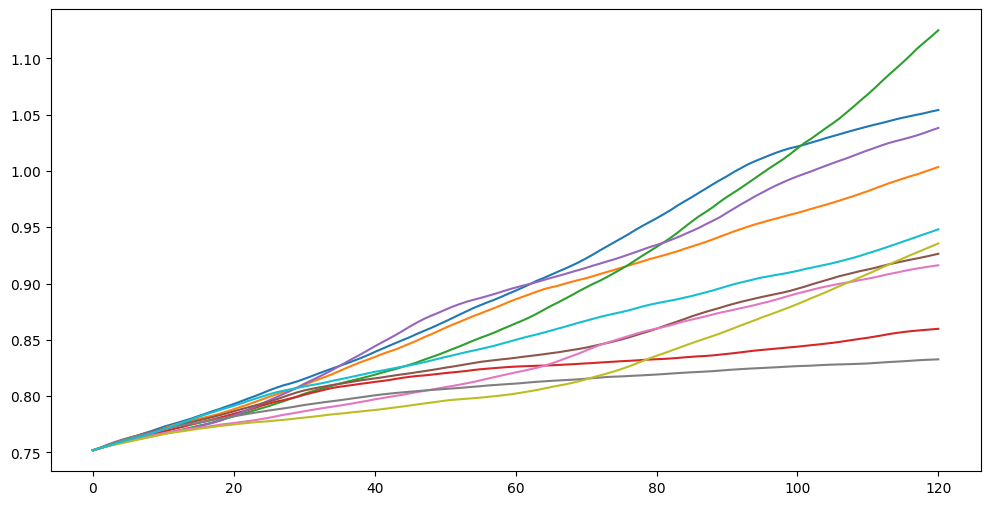

In [10]:
av_cash.plot(legend=False, figsize=(12,6))

The above shows that an investment of only cash will have a range of outcomes at the end of the period.

<Axes: >

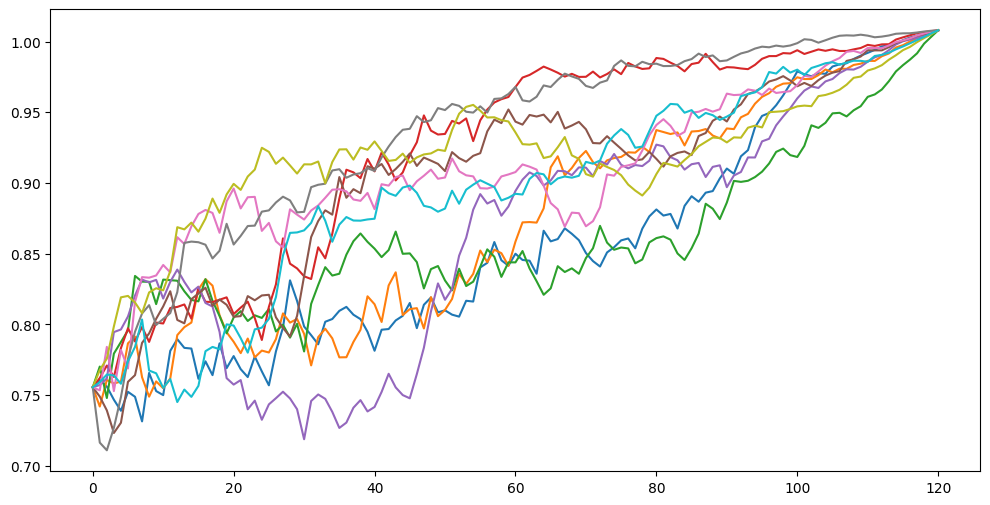

In [12]:
av_zc_bonds.plot(legend=False, figsize=(12,6))

The above shows that investing in zero coupon bonds involves volatility along the way, but the outcome at the end is consistent

<Axes: title={'center': 'Percentage Change of Funding Ratio with Cash (10 Scenarios)'}>

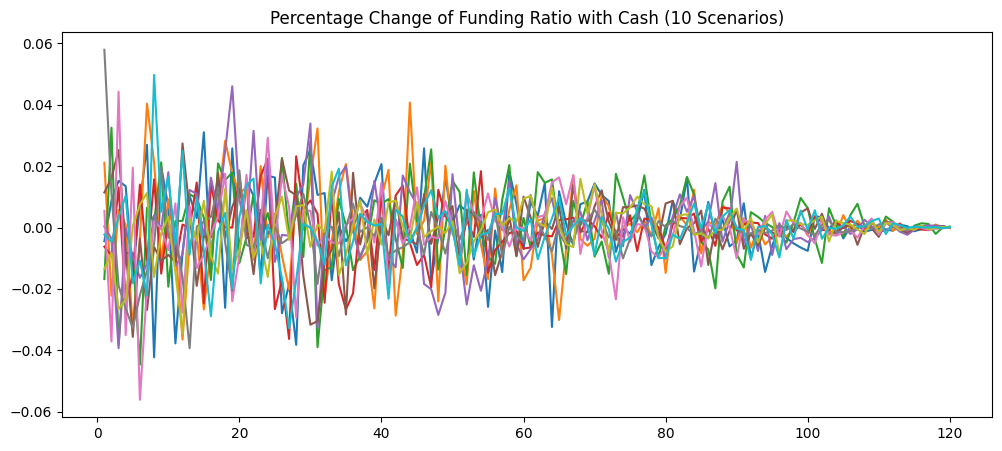

In [13]:
(av_cash/liabilities).pct_change().plot(title="Percentage Change of Funding Ratio with Cash (10 Scenarios)", legend=False, figsize=(12,5)) # cash / liabilities gives you the funding ratio

As seen from the chart above, with cash, the funding ratio is highly variable

<Axes: title={'center': 'Percentage Change of Funding Ratio with Cash (10 Scenarios)'}>

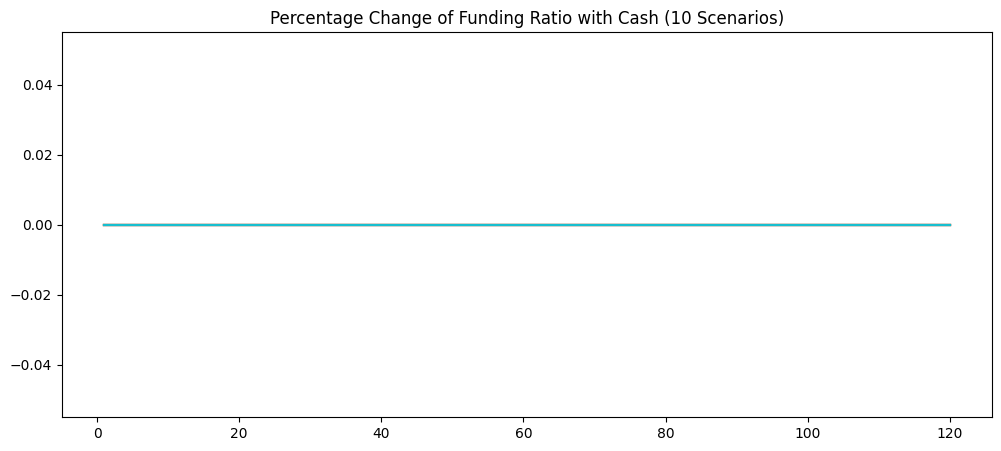

In [14]:
(av_zc_bonds/liabilities).pct_change().plot(title="Percentage Change of Funding Ratio with Cash (10 Scenarios)", legend=False, figsize=(12,5)) # zc bonds / liabilities gives you the funding ratio

In this case, the funding ratio is steady throughout.

We will look at the terminal funding ratio. This is the range of ways in which the story could end when you invest with different vehicles

In [15]:
a_0 = 0.75
rates, bond_prices = erk.cir(n_scenarios=10000, r_0=0.03, b=0.03)
liabilities = bond_prices
zc_0 = erk.pv(zcbond_10, 0.03)
n_bonds = a_0/zc_0
av_zc_bonds = n_bonds*bond_prices
av_cash = a_0*(rates/12 + 1).cumprod()

<Axes: >

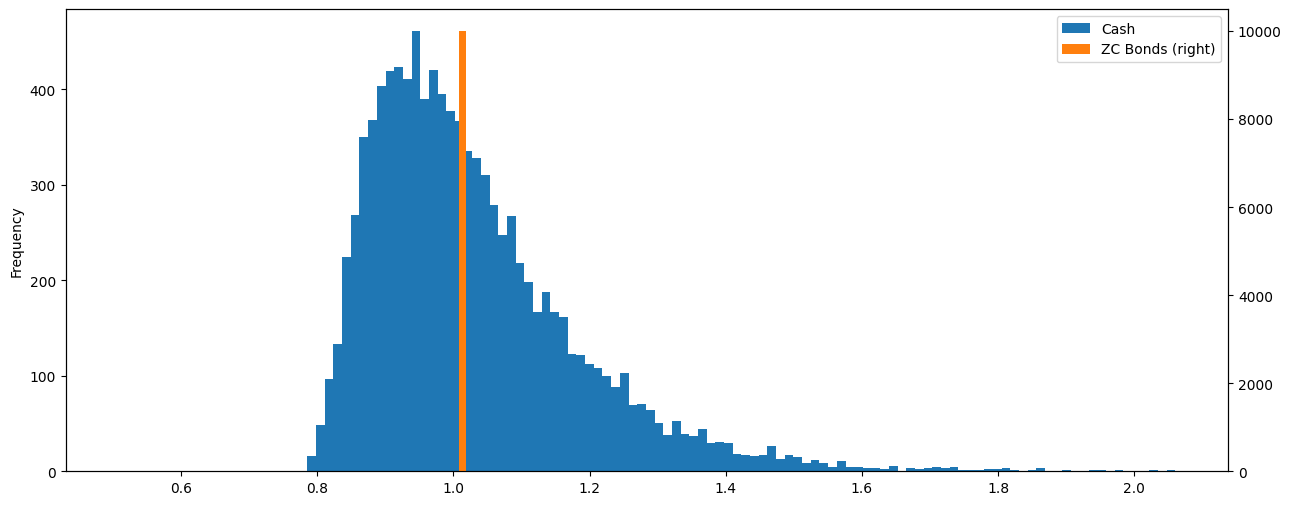

In [16]:
# we will calculate the terminal funding ratios
tfr_cash = av_cash.iloc[-1]/liabilities.iloc[-1]  #last values of cash divided by last values of liabilities
tfr_bonds = av_zc_bonds.iloc[-1]/liabilities.iloc[-1]  #last values of bonds divided by last values of liabilities
ax = tfr_cash.plot.hist(label="Cash", figsize=(15,6), bins=100, legend=True)
tfr_bonds.plot.hist(ax=ax, label="ZC Bonds", bins=100, legend=True, secondary_y=True)

Note that if a_0 were less, say 0.50, and we had the same investment period of 10 years, then we would have a lower funding ratio at the end, even for the ZC bond portfolio